<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/handlebar/LSTM/Lstm__Handlebar_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For Vscode
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
import tensorflow as tf #building model
RANDOM_SEED = 42

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *

df = pd.read_csv('../../../data/handlebar/processed_segments_overlap_50.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [25]:
# For Colab
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
import tensorflow as tf #building model
RANDOM_SEED = 42


import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/processed_segments_overlap_50.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [30]:
#df.drop('Unnamed: 0', axis=1, inplace=True)


In [3]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'],
                                                                    test_size=0.2,
                                                                    random_state=RANDOM_SEED)

In [4]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])
train_data_scaled.shape


(7453, 100)

In [5]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [6]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]

In [7]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [8]:
# Reshape the data for LSTM input((samples, timesteps, features))
normal_train_data_scaled_lstm = np.expand_dims(normal_train_data_scaled, axis=1)
normal_test_data_scaled_lstm = np.expand_dims(normal_test_data_scaled, axis=1)
abnormal_test_data_scaled_lstm = np.expand_dims(abnormal_test_data_scaled, axis=1)
normal_train_data_scaled_lstm.shape, normal_test_data_scaled_lstm.shape, abnormal_test_data_scaled_lstm.shape

((7178, 1, 100), (1796, 1, 100), (68, 1, 100))

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

model = Sequential()
# Encoder
model.add(Input(shape=(normal_train_data_scaled_lstm.shape[1], normal_train_data_scaled_lstm.shape[2])))
model.add(LSTM(224, activation='tanh', return_sequences=True))
model.add(LSTM(224, activation='tanh', return_sequences=True))

#decoder
model.add(LSTM(224, activation='tanh', return_sequences=True))
model.add(LSTM(224, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(normal_train_data_scaled_lstm.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 224)         │       291,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 224)         │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 1, 224)         │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 1, 224)         │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 1, 100)         │        22,500 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,520,612 (5.80 MB)

 Trainable params: 1,520,612 (5.80 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# define early stopping to prevent overfit
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",
                                               patience=10,
                                               mode="min",
                                               verbose=1,
                                               restore_best_weights=True)

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00044)
model.compile(optimizer=optimizer, loss='mae')

In [41]:
# fit model
history = model.fit(
    normal_train_data_scaled_lstm, normal_train_data_scaled_lstm,
    epochs=200,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping],
    shuffle=True,
    verbose=1)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.4703 - val_loss: 0.4506
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4507 - val_loss: 0.4127
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4173 - val_loss: 0.4015
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4043 - val_loss: 0.3887
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3922 - val_loss: 0.3843
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3867 - val_loss: 0.3712
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3769 - val_loss: 0.3622
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3635 - val_loss: 0.3573
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3606 - val_loss: 0.3497
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3564 - val_loss: 0.3465
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3523 - val_loss: 0.3454
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

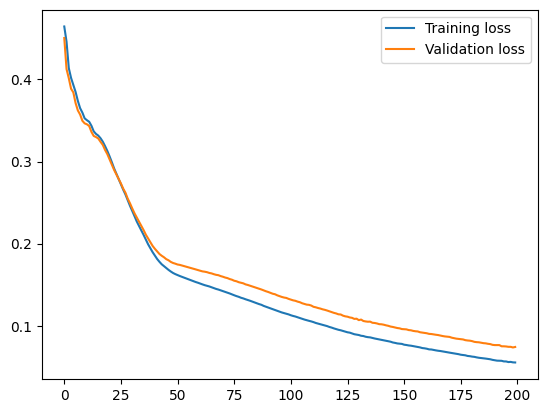

In [42]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [10]:
load_model = tf.keras.models.load_model('../../../models/lstm_autoencoder_handlebar_best.keras')

c:\Users\liuzi\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
